# 🎥 Checkpoint 4 - Classical CV: Counting Yellow Obstacles

## 📌 Goal
You are given a video containing multiple objects of different colors.  
Your task is to **detect how many yellow obstacles are present in each frame** and output this as an array.

This assignment will help you practice **color-based segmentation, video processing, using Google Colab, and working through some corner cases** in computer vision.

---


In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [44]:
train_video_path = "res/Train-Checkpoint-CV.mp4"
test_video_path = "res/Test-Checkpoint-CV.mp4"

In [45]:
cap = cv2.VideoCapture("video.mp4")

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break
  cv2.imshow("Frame", frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [46]:
lower_yellow = np.array([20, 150, 20])   # lower bound [H, S, V]
upper_yellow = np.array([35, 255, 255])  # upper bound [H, S, V]

In [47]:
def get_mask(frame, overlay_contours=False):
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
  if overlay_contours:
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    cs = [i for i in contours]
    cs.sort(key=lambda c: cv2.contourArea(c))

    draw_num = 5
    
    for x in range(1, 4 +1):
      cv2.drawContours(mask, cs, len(cs) - x, (-1, 255 -  x * 255 / draw_num, x*255 / draw_num), 3)
    return mask
  else:
    return mask

def count_yellow_obstacles(frame):
  # 1. Apply HSV Filtering on the frame to obtain a mask of yellow objects
  mask = get_mask(frame)

  # 2. Use Contours to identify these objects in the mask (remember, all other objects will be masked out!)
  contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #print(len(contours))
  
  # 3. Use some logic (like the area or shape of the contour to detect obstacles)
  # yellow_obstacle_count = sum([cv2.contourArea(cv2.convexHull(i)) > 1000 for i in contours])
  yellow_obstacle_count = sum([cv2.contourArea(i) > 800 for i in contours])

  # Visualization
  frame_resized = cv2.resize(frame, (300, 300))
  mask_resized  = cv2.resize(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), (300, 300))
  side_by_side  = np.hstack((frame_resized, mask_resized))
  # cv2.imshow(side_by_side)

  # 4. Return a count of yellow obstacles identified
  return yellow_obstacle_count

## Step 5: Integrate everything into `main()`

In any program, the `main()` or `run()` function serves as the entry point to the rest of the functionality. So that's what we'll implement as well.

103
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2]


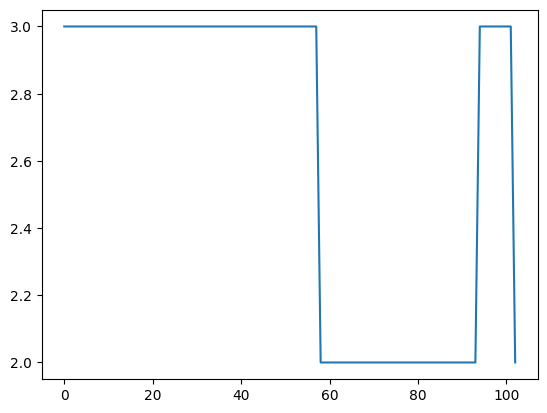

In [48]:
from matplotlib.figure import Figure

def main(video_path=train_video_path, stop_frame=-1):
  cap = cv2.VideoCapture(video_path)
  yellow_obstacle_count_list = []
  target_fps = 5
  input_fps = cap.get(cv2.CAP_PROP_FPS)
  frame_interval = int(round(input_fps / target_fps))

  frame_count = 0

  stopped_frame = None

  while cap.isOpened():
      ret, frame = cap.read()
      if not ret:
          break

      if frame_count % frame_interval == 0:
        yellow_obstacle_count = count_yellow_obstacles(frame)
        yellow_obstacle_count_list.append(yellow_obstacle_count)
        if (stop_frame != -1 and frame_count == stop_frame * frame_interval):
          #cv2.imshow("frame", frame)
          stopped_frame = frame
          #plt.imshow(get_mask(frame, True))
          #break
          # pass


      frame_count += 1

  print(len(yellow_obstacle_count_list))
  print(yellow_obstacle_count_list)

  if stop_frame != -1:
    fr = cv2.cvtColor(stopped_frame, cv2.COLOR_BGR2RGB)
    highlight = get_mask(stopped_frame, True)
    plt.imshow(np.hstack((fr, highlight)))
  else:
    plt.plot(yellow_obstacle_count_list)

main()
#main(video_path=test_video_path, stop_frame=-1)


125
[3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


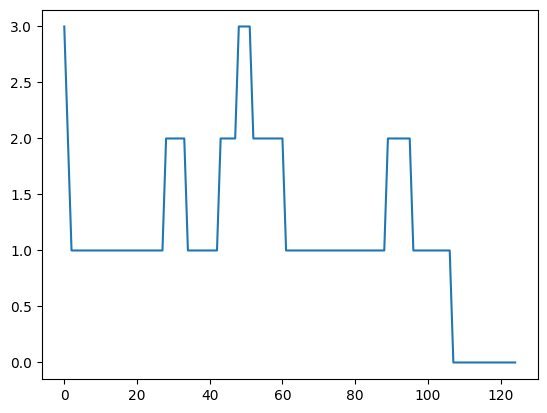

In [49]:
main(video_path=test_video_path)#, stop_frame=48)

125
[3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


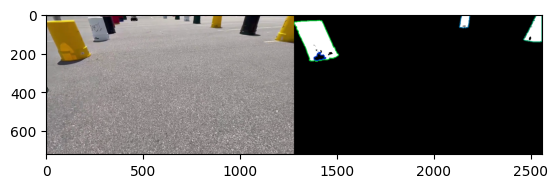

In [50]:
main(video_path=test_video_path, stop_frame=48)